# Playing Around With Data

The data is stored on the AWS S3 cloud.<br>
s3://sevir/CATALOG.csv CATALOG.cs <br>
s3://sevir/data/vil

Data is now also stored on external hard drive (D:)


Instead of downloading all of the data, I will access it through the cloud (maybe)?

In [2]:
# import s3fs
import pandas as pd
import os
import h5py # needs conda/pip install h5py
import matplotlib.pyplot as plt
import io
from scipy import ndimage
import numpy as np
import Spear
# from urllib.parse import urlparse
# import boto3
# import fsspec

ModuleNotFoundError: No module named 'Spear'

In [4]:
# Enter path to the SEVIR data location
DATA_PATH    = 'D:\SEVIR Data\data'
CATALOG_PATH = 'D:\SEVIR Data/CATALOG.csv' 

# On some Linux systems setting file locking to false is also necessary:
# import os
# os.environ["HDF5_USE_FILE_LOCKING"]='FALSE' 

In [5]:
# catalog = pd.read_csv('s3://sevir/CATALOG.csv')

In [6]:
# catalog.head(5)

# Importing Images and Calculating Weighted Center of Mass

Event ID: b'R17062923508200'
Image shape: (384, 384, 49)
Center of Mass Image 1: (143.41018534298124, 126.33653868297783)
Center of Mass Image 2: (131.45592621944047, 135.59352626880235)
Center of Mass Image 3: (119.59788978674644, 141.5399187463726)
Center of Mass Image 4: (117.16878998960162, 158.92099323311376)


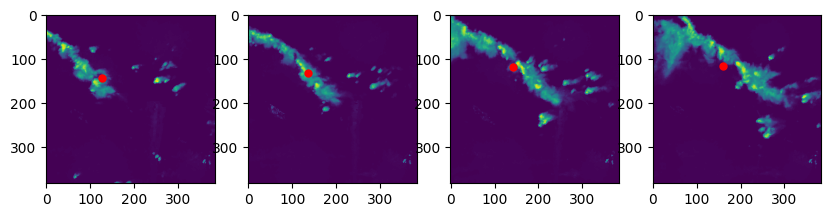

In [7]:
# import os
# import h5py # needs conda/pip install h5py
# import matplotlib.pyplot as plt



file_index = 5
with h5py.File('%s/vil/2017/SEVIR_VIL_RANDOMEVENTS_2017_0501_0831.h5' % DATA_PATH,'r') as hf:
    event_id = hf['id'][file_index]
    vil      = hf['vil'][file_index] 
    
print('Event ID:',event_id)
print('Image shape:',vil.shape)

# vil = spear.read_data('R17061710557825', 'vil')

image1 = np.array(vil[:,:,10])
image2 = np.array(vil[:,:,20])
image3 = np.array(vil[:,:,30])
image4 = np.array(vil[:,:,40])
# image1.tofile('dataTest.csv', sep = ',')

centerOfMass1 = ndimage.center_of_mass(image1)
centerOfMass2 = ndimage.center_of_mass(image2)
centerOfMass3 = ndimage.center_of_mass(image3)
centerOfMass4 = ndimage.center_of_mass(image4)
print('Center of Mass Image 1:',centerOfMass1)
print('Center of Mass Image 2:',centerOfMass2)
print('Center of Mass Image 3:',centerOfMass3)
print('Center of Mass Image 4:',centerOfMass4)


fig,axs=plt.subplots(1,4,figsize=(10,5))
fig1 = axs[0].imshow(image1)
# plt.plot(centerOfMass1[0], centerOfMass1[1], "or", markersize=10)
axs[0].plot(centerOfMass1[1], centerOfMass1[0], 'or', markersize=5)
fig2 = axs[1].imshow(image2)
axs[1].plot(centerOfMass2[1], centerOfMass2[0], 'or', markersize=5)
fig3 = axs[2].imshow(image3)
axs[2].plot(centerOfMass3[1], centerOfMass3[0], 'or', markersize=5)
fig4 = axs[3].imshow(image4)
axs[3].plot(centerOfMass4[1], centerOfMass4[0], 'or', markersize=5)
plt.show()

In [8]:
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
zeroes = (image1[:,:] == 0).sum()/(384*384) * 100
print(zeroes, 'percent of data is zero')

66.33232964409721 percent of data is zero


# Binarizing Image
#### First binary conversion does not account for weights
#### Second binary conversion accounts for data point weights with frequency
#### Using a threshold of 30 (arbitrarily picked) to add data points (weight must be greater than 30)

In [9]:

# A numpy array is a real array in a computer science sense, which means it cannot be resized. 
# Since appending requires resizing, numpy is forced to create a whole new array with a bigger allocation and 
# copy all the old data over before adding any new data. This takes a lot of time. Python lists are resizeable therefore appending is very fast.
# https://www.reddit.com/r/learnpython/comments/jm8u3m/numpyappend_in_python_slower_faster_than/
image1BinaryWeightedX = []
image1BinaryWeightedY = []
image1BinaryX = []
image1BinaryY = []
for (x,y), value in np.ndenumerate(image1):
    if(value > 50):
        image1BinaryX.append(x)
        image1BinaryY.append(y)
        for z in range(value):
            image1BinaryWeightedX.append(x)
            image1BinaryWeightedY.append(y)            
image1BinaryX = np.array(image1BinaryX)
image1BinaryY = np.array(image1BinaryY)
image1BinaryWeightedX = np.array(image1BinaryWeightedX)
image1BinaryWeightedY = np.array(image1BinaryWeightedY)
print(image1BinaryX.size)
print(image1BinaryWeightedX.size)
# print(image1BinaryX.length())

6571
668078


In [10]:
print(image1.shape)
x, y = np.where(image1>50)
x.shape

(384, 384)


(6571,)

#### Origin of imshow is top left corner. X-axis is increasing going down the vertical. Y-axis is increasing along horizontal to the right
#### In scatter plot, origin is bottom left with normal cartesian axes.
#### The difference in coordinate systems is why Y and X have to be switched and Y-axis inverted when using scatterplot.

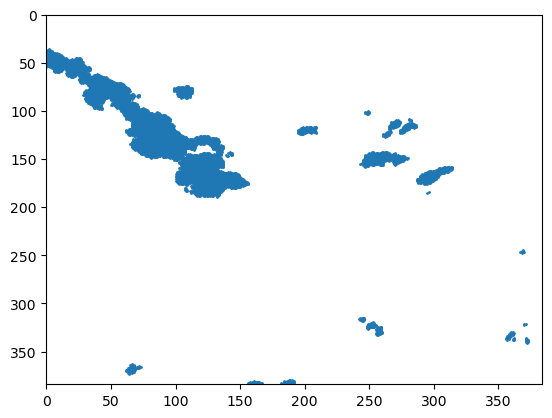

In [23]:
fig = plt.scatter(image1BinaryY, image1BinaryX, s=1)
ax = plt.gca()
ax.set_xlim([0, 384])
ax.set_ylim([0, 384])
plt.gca().invert_yaxis()
# weightedBinary = plt.imshow(fig)

# Applying Morphlogy (Open/Close Image)


In [24]:
# kernel = np.ones((20, 20), np.uint8)
# # defining the opening function  
# # over the image and structuring element 
# opening = cv2.morphologyEx(image1Binary, cv2.MORPH_OPEN, kernel)
# plt.imshow(opening)
# closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
# plt.imshow(closing)

In [25]:
# # https://matplotlib.org/stable/gallery/statistics/confidence_ellipse.html
# import confidence_ellipse

# covariance = np.cov(image1BinaryWeightedX, image1BinaryWeightedY)
# eigenvalues, eigenvectors = np.linalg.eig(covariance)
# print('Covariance Matrix:', covariance)
# # theta = np.linspace(0, 2*np.pi, 1000);
# # ellipsis = (np.sqrt(eigenvalues[None,:]) * eigenvectors) @ [np.sin(theta), np.cos(theta)]
# # plt.scatter(image1BinaryWeightedY, image1BinaryWeightedX, s=1)
# # plt.plot(ellipsis[0,:], ellipsis[1,:])

# confidence_ellipse.confidence_ellipse(image1BinaryWeightedY, image1BinaryWeightedX, , edgecolor='red')

NameError: name 'BinarycenterOfMass1' is not defined

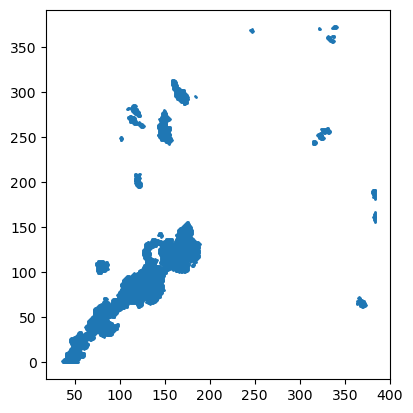

In [29]:
covariance = np.cov(image1BinaryX, image1BinaryY)
eigenvalues, eigenvectors = np.linalg.eig(covariance)
eigenvalues = np.sqrt(eigenvalues)
from matplotlib.patches import Ellipse
ax = plt.subplot(111, aspect='equal')
plt.scatter(image1BinaryX, image1BinaryY, s=1)
for j in range(1, 4):
    ell = Ellipse(xy=(BinarycenterOfMass1[0], BinarycenterOfMass1[1]),
                  width=eigenvalues[0]*j*2, height=eigenvalues[1]*j*2,
                  angle=np.rad2deg(np.arccos(eigenvectors[0, 0])))
    ell.set_facecolor('none')
    ell.set_edgecolor('red')
    ax.add_artist(ell)
    print('Semi-Major:', eigenvalues[0]*j*2, 'Semi-Minor:', eigenvalues[1]*j*2)
plt.plot(BinarycenterOfMass1[0], BinarycenterOfMass1[1], 'or', markersize=5)
# plt.gca().invert_yaxis()
plt.show()
print('Angle:', np.rad2deg(np.arccos(eigenvectors[0, 0])))

Semi-Major: 81.21513344673724 Semi-Minor: 171.8412336737526
Semi-Major: 162.43026689347448 Semi-Minor: 343.6824673475052
Semi-Major: 243.64540034021172 Semi-Minor: 515.5237010212578


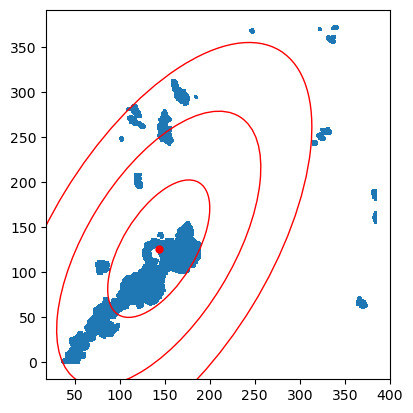

Angle: 148.54542292237656


In [30]:
covariance = np.cov(image1BinaryWeightedX, image1BinaryWeightedY)
eigenvalues, eigenvectors = np.linalg.eig(covariance)
eigenvalues = np.sqrt(eigenvalues)
from matplotlib.patches import Ellipse
ax = plt.subplot(111, aspect='equal')
plt.scatter(image1BinaryWeightedX, image1BinaryWeightedY, s=1)
for j in range(1, 4):
    ell = Ellipse(xy=(centerOfMass1[0], centerOfMass1[1]),
                  width=eigenvalues[0]*j*2, height=eigenvalues[1]*j*2,
                  angle=np.rad2deg(np.arccos(eigenvectors[0, 0])))
    ell.set_facecolor('none')
    ell.set_edgecolor('red')
    ax.add_artist(ell)    
    print('Semi-Major:', eigenvalues[0]*j*2, 'Semi-Minor:', eigenvalues[1]*j*2)
plt.plot(centerOfMass1[0], centerOfMass1[1], 'or', markersize=5)
# plt.gca().invert_yaxis()
plt.show()
print('Angle:', np.rad2deg(np.arccos(eigenvectors[0, 0])))

In [31]:
# Next, puul out semi major/minor magnitudes and angle. Then calculate for a series of images and find vector for the differential.

### Comparing weighted and unweighted center of masses

In [32]:
import cv2
# # https://note.nkmk.me/en/python-numpy-opencv-image-binarization/#:~:text=This%20article%20describes%20how%20to,a%20basic%20operation%20of%20NumPy.

# Replaces anything larger than threshold with maxValue (1)
# max, image1Binary = cv2.threshold(image1, 30, 1, cv2.THRESH_BINARY)

# # Leaves anything larger than threshold as is
# # max, image1Binary = cv2.threshold(image1, 30, 1, cv2.THRESH_TOZERO)

max, image1Binary = cv2.threshold(image1, 250, 1, cv2.THRESH_TOZERO)
BinarycenterOfMass1 = ndimage.center_of_mass(image1Binary)
max, image2Binary = cv2.threshold(image2, 250, 1, cv2.THRESH_TOZERO)
BinarycenterOfMass2 = ndimage.center_of_mass(image2Binary)
max, image3Binary = cv2.threshold(image3, 250, 1, cv2.THRESH_TOZERO)
BinarycenterOfMass3 = ndimage.center_of_mass(image3Binary)
max, image4Binary = cv2.threshold(image4, 250, 1, cv2.THRESH_TOZERO)
BinarycenterOfMass4 = ndimage.center_of_mass(image4Binary)


# plt.imshow(image1Binary)
print('Center of Mass Image 1:',centerOfMass1)
print('Center of Mass Binarized Image 1:',BinarycenterOfMass1)
print('Center of Mass Image 2:',centerOfMass3)
print('Center of Mass Binarized Image 2:',BinarycenterOfMass2)
print('Center of Mass Image 3:',centerOfMass1)
print('Center of Mass Binarized Image 3:',BinarycenterOfMass3)
print('Center of Mass Image 4:',centerOfMass3)
print('Center of Mass Binarized Image 4:',BinarycenterOfMass4)


Center of Mass Image 1: (143.41018534298124, 126.33653868297783)
Center of Mass Binarized Image 1: (nan, nan)
Center of Mass Image 2: (119.59788978674644, 141.5399187463726)
Center of Mass Binarized Image 2: (nan, nan)
Center of Mass Image 3: (143.41018534298124, 126.33653868297783)
Center of Mass Binarized Image 3: (nan, nan)
Center of Mass Image 4: (119.59788978674644, 141.5399187463726)
Center of Mass Binarized Image 4: (nan, nan)


C:\Users\jared\anaconda3\Lib\site-packages\scipy\ndimage\_measurements.py:1535: RuntimeWarning: invalid value encountered in scalar divide
  results = [sum(input * grids[dir].astype(float), labels, index) / normalizer


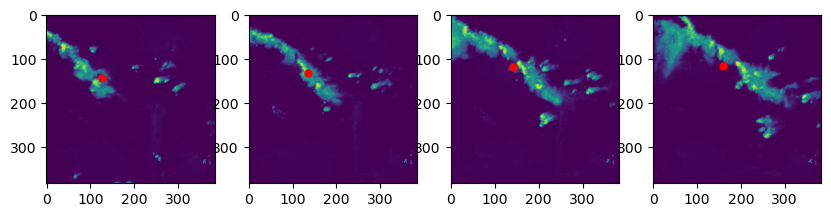

Red dot is the weighted center of mass. White X is the unweighted COM.
Is the difference really very significant? 
Doesn't appear to be on the plots. Possible it could have an effect in model


In [33]:
fig,axs=plt.subplots(1,4,figsize=(10,5))
fig1 = axs[0].imshow(image1)
# plt.plot(centerOfMass1[0], centerOfMass1[1], "or", markersize=10)
axs[0].plot(centerOfMass1[1], centerOfMass1[0], 'or', markersize=5)
axs[0].plot(BinarycenterOfMass1[1], BinarycenterOfMass1[0], 'wx', markersize=5)
fig2 = axs[1].imshow(image2)
axs[1].plot(centerOfMass2[1], centerOfMass2[0], 'or', markersize=5)
axs[1].plot(BinarycenterOfMass2[1], BinarycenterOfMass2[0], 'wx', markersize=5)
fig3 = axs[2].imshow(image3)
axs[2].plot(centerOfMass3[1], centerOfMass3[0], 'or', markersize=5)
axs[2].plot(BinarycenterOfMass3[1], BinarycenterOfMass3[0], 'wx', markersize=5)
fig4 = axs[3].imshow(image4)
axs[3].plot(centerOfMass4[1], centerOfMass4[0], 'or', markersize=5)
axs[3].plot(BinarycenterOfMass4[1], BinarycenterOfMass4[0], 'wx', markersize=5)
plt.show()
print("""Red dot is the weighted center of mass. White X is the unweighted COM.
Is the difference really very significant? 
Doesn\'t appear to be on the plots. Possible it could have an effect in model""")



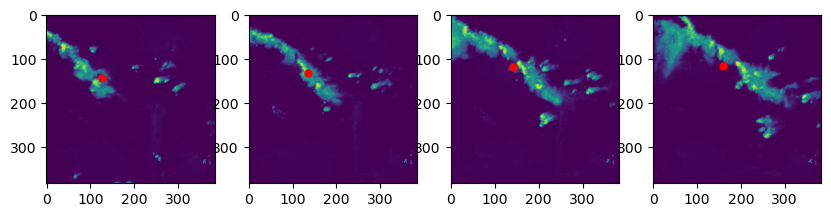

Semi-Major: 40.60756672336862 Semi-Minor: 85.9206168368763
Semi-Major: 81.21513344673724 Semi-Minor: 171.8412336737526
Semi-Major: 121.82270017010586 Semi-Minor: 257.7618505106289


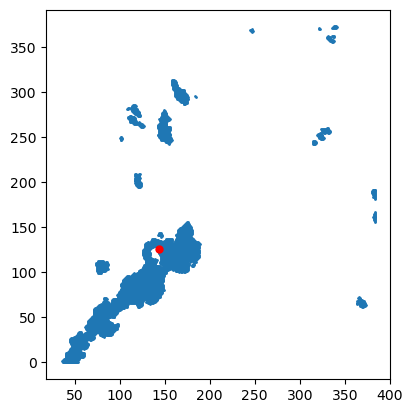

Angle: 148.54542292237656


In [34]:
from matplotlib.patches import Ellipse




fig,axs=plt.subplots(1,4,figsize=(10,5))
fig1 = axs[0].imshow(image1)
axs[0].plot(centerOfMass1[1], centerOfMass1[0], 'or', markersize=5)
axs[0].plot(BinarycenterOfMass1[1], BinarycenterOfMass1[0], 'wx', markersize=5)
fig2 = axs[1].imshow(image2)
axs[1].plot(centerOfMass2[1], centerOfMass2[0], 'or', markersize=5)
axs[1].plot(BinarycenterOfMass2[1], BinarycenterOfMass2[0], 'wx', markersize=5)
fig3 = axs[2].imshow(image3)
axs[2].plot(centerOfMass3[1], centerOfMass3[0], 'or', markersize=5)
axs[2].plot(BinarycenterOfMass3[1], BinarycenterOfMass3[0], 'wx', markersize=5)
fig4 = axs[3].imshow(image4)
axs[3].plot(centerOfMass4[1], centerOfMass4[0], 'or', markersize=5)
axs[3].plot(BinarycenterOfMass4[1], BinarycenterOfMass4[0], 'wx', markersize=5)
plt.show()




ax = plt.subplot(111, aspect='equal')
plt.scatter(image1BinaryX, image1BinaryY, s=1)
for j in range(1, 4):
    ell = Ellipse(xy=(BinarycenterOfMass1[0], BinarycenterOfMass1[1]),
                  width=eigenvalues[0]*j*2, height=eigenvalues[1]*j*2,
                  angle=np.rad2deg(np.arccos(eigenvectors[0, 0])))
    ell.set_facecolor('none')
    ell.set_edgecolor('red')
    ax.add_artist(ell)
    print('Semi-Major:', eigenvalues[0]*j, 'Semi-Minor:', eigenvalues[1]*j)
plt.plot(centerOfMass1[0], centerOfMass1[1], 'or', markersize=5)
# plt.gca().invert_yaxis()
plt.show()
print('Angle:', np.rad2deg(np.arccos(eigenvectors[0, 0])))

## Plot of Semi-major/semi-minor

In [35]:
max, image1Binary = cv2.threshold(image1, 100, 1, cv2.THRESH_TOZERO)
# plt.imshow(image1Binary)
np.mean(image1Binary)

2.6051432291666665

In [36]:
unique, counts = np.unique(image1Binary, return_counts=True)
# print(np.asarray((unique, counts)).T)

In [37]:
threshold = 100
image = image1
weightedImageBinaryX = []
weightedImageBinaryY = []
imageBinaryX = []
imageBinaryY = []
for (x,y), value in np.ndenumerate(image):
    if(value > threshold):
        imageBinaryX.append(x)
        imageBinaryY.append(y)
        for z in range(value):
            weightedImageBinaryX.append(x)
            weightedImageBinaryY.append(y)            
imageBinaryX = np.array(imageBinaryX)
imageBinaryY = np.array(imageBinaryY)
weightedImageBinaryX = np.array(weightedImageBinaryX)
weightedImageBinaryY = np.array(weightedImageBinaryY)

covariance = np.cov(weightedImageBinaryX, weightedImageBinaryY)
eigenvalues, eigenvectors = np.linalg.eig(covariance)
eigenvalues = np.sqrt(eigenvalues)


## Finding Average Intensity of binarized image

In [38]:
import math
print(imageBinaryX.size)
print(weightedImageBinaryX.size)
avgInt = weightedImageBinaryX.size/imageBinaryX.size
print(avgInt)
area = math.pi * eigenvalues[0]*2 * eigenvalues[1]*2
print('Major', eigenvalues[0]*2)
print(eigenvalues[1]*2)
print(area)
print(area/avgInt)

2881
384144
133.33703575147518
Major 71.98124685597023
170.193703799338
38486.88192938656
288.64359937565774


In [39]:
import h5py # needs conda/pip install h5py
import matplotlib.pyplot as plt
import pandas as pd  

DATA_PATH    = 'D:\ThesisData\data'
CATALOG_PATH = 'D:\ThesisData/CATALOG.csv'

# Read catalog
catalog = pd.read_csv(CATALOG_PATH,parse_dates=['time_utc'],low_memory=False)

# Desired image types
img_types = set(['vil'])

# Group by event id, and filter to only events that have all desired img_types
events = catalog.groupby('id').filter(lambda x: img_types.issubset(set(x['img_type']))).groupby('id')
event_ids = list(events.groups.keys())
print('Found %d events matching' % len(event_ids),img_types)

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\ThesisData/CATALOG.csv'

In [ ]:
# Grab a sample event and view catalog entries
sample_event = events.get_group( event_ids[5])
print('Sample Event:',event_ids[5])
var = sample_event.loc[:,'file_name'].item()
print(var)
type(var)

In [ ]:
import h5py # needs conda/pip install h5py
import matplotlib.pyplot as plt
import pandas as pd
import spear as sp
import numpy as np
from pathlib import Path  
import time

DATA_PATH    = 'D:\SEVIR Data\data'
CATALOG_PATH = 'D:\SEVIR Data/CATALOG.csv'

# Read catalog
catalog = pd.read_csv(CATALOG_PATH,parse_dates=['time_utc'],low_memory=False)

# Desired image types
img_types = set(['vil'])

# Group by event id, and filter to only events that have all desired img_types
events = catalog.groupby('id').filter(lambda x: img_types.issubset(set(x['img_type']))).groupby('id')
event_ids = list(events.groups.keys())
print('Found %d events matching' % len(event_ids),img_types)

In [ ]:
sample_event = events.get_group(event_ids[4324])

In [ ]:
sample_event

In [ ]:
vil = spear.read_data(sample_event, 'vil')

In [ ]:
print(sample_event)

In [ ]:
im = np.array(vil[:,:,10])
plt.imshow(im)

# FIXING PARAMETER EXTRACTION

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('D:\Extracted Data/R17061817477686_Params.csv')
# df.head()
velX = df.loc[:,'VelocityX']
# velX
type(velX)

velX = np.asarray(velX)
# velX

velX = np.roll(velX,-1)
# velX

In [ ]:
# import s3fs
import pandas as pd
import os
import h5py # needs conda/pip install h5py
import matplotlib.pyplot as plt
import io
from scipy import ndimage
import numpy as np
import spear

DATA_PATH    = 'D:\SEVIR Data\data'
CATALOG_PATH = 'D:\SEVIR Data/CATALOG.csv' 


file_index = 20
with h5py.File('%s/vil/2017/SEVIR_VIL_RANDOMEVENTS_2017_0501_0831.h5' % DATA_PATH,'r') as hf:
    event_id = hf['id'][file_index]
    vil      = hf['vil'][file_index] 
    
print('Event ID:',event_id)
print('Image shape:',vil.shape)

# vil = spear.read_data('R17061710557825', 'vil')

image1 = np.array(vil[:,:,10])
image2 = np.array(vil[:,:,20])
image3 = np.array(vil[:,:,30])
image4 = np.array(vil[:,:,40])
# image1.tofile('dataTest.csv', sep = ',')

centerOfMass1 = ndimage.center_of_mass(image1)
centerOfMass2 = ndimage.center_of_mass(image2)
centerOfMass3 = ndimage.center_of_mass(image3)
centerOfMass4 = ndimage.center_of_mass(image4)
print('Center of Mass Image 1:',centerOfMass1)
print('Center of Mass Image 2:',centerOfMass2)
print('Center of Mass Image 3:',centerOfMass3)
print('Center of Mass Image 4:',centerOfMass4)


fig,axs=plt.subplots(1,4,figsize=(10,5))
fig1 = axs[0].imshow(image1)
# plt.plot(centerOfMass1[0], centerOfMass1[1], "or", markersize=10)
axs[0].plot(centerOfMass1[1], centerOfMass1[0], 'or', markersize=5)
fig2 = axs[1].imshow(image2)
axs[1].plot(centerOfMass2[1], centerOfMass2[0], 'or', markersize=5)
fig3 = axs[2].imshow(image3)
axs[2].plot(centerOfMass3[1], centerOfMass3[0], 'or', markersize=5)
fig4 = axs[3].imshow(image4)
axs[3].plot(centerOfMass4[1], centerOfMass4[0], 'or', markersize=5)
plt.show()

In [ ]:
non_zero_indices_x, non_zero_indices_y = np.nonzero(image1)
non_zero_values = image1[non_zero_indices_x, non_zero_indices_y]
non_zero_values = non_zero_values[(non_zero_values > 100)]
# non_zero_values
average = np.average(non_zero_values)
average
